In [1]:
'''
IMPORTING LIBRARIES
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
import sys
from pathlib import Path

# src folder with python modules added
src_path = Path("../src").resolve()
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

import functions as funct # importing module

In [3]:
# Create DataFrame using Pandas. Path to the base file 'raw.csv'
df = pd.read_csv('../Data/raw.csv', delimiter=',')

# Preliminary Data Review 🔎

In [5]:
# First five rows and columns of the dataset
print(df.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [6]:
# Obtain Data Type of each column
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None


In [7]:
# General distribution and cahracteristics of the dataset
print(df.describe()) 

       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_1961373  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  


In [8]:
'''
SECURITY COPY
'''
# generate a new Data Frame for modifying information
df_clean = df.copy()
df_clean.head() # check the copy

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## DATA PROCESSING (cleaning) 💻

In [10]:
# search null values
df_clean.isnull().sum() 

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [11]:
# Item Column
item_mode = funct.mode_calculator(df_clean, 'Item')
print(f'Item Mode: {item_mode}')

funct.data_replacement(df_clean, 'Item', item_mode)

Item Mode: Juice


True

In [12]:
# Quantity Column
quantity_mean = funct.mean_calculator(df_clean, 'Quantity')
print(f'Quantity Average: {quantity_mean}')

funct.data_replacement(df_clean, 'Quantity', quantity_mean)

Quantity Average: 3.028463396702027


True

In [13]:
# Price Per Unit Column
price_pu_mean = funct.mean_calculator(df_clean, 'Price Per Unit')
print(f'Price Per Unit Mean: {price_pu_mean}')

funct.data_replacement(df_clean, 'Price Per Unit', price_pu_mean)

Price Per Unit Mean: 2.949984155487483


True

In [14]:
# Total Spent Column
total_spent_mean = funct.mean_calculator(df_clean, 'Total Spent')
print(f'Total Spent Mean: {total_spent_mean}')

df_clean.loc[df_clean['Total Spent'].isna(), 'Total Spent'] = df_clean['Quantity'] * df_clean['Price Per Unit']


Total Spent Mean: 8.924352495262161


In [15]:
# Payment Method Column
payment_method_mode = funct.mode_calculator(df_clean, 'Payment Method')
print(f'Payment Method Mode: {payment_method_mode}')

funct.data_replacement(df_clean, 'Payment Method', payment_method_mode)


Payment Method Mode: Digital Wallet


True

In [16]:
# Location Column
location_mode = funct.mode_calculator(df_clean, 'Location')
print(f'Location Mode: {location_mode}')

funct.data_replacement(df_clean, 'Location', location_mode)

Location Mode: Takeaway


True

In [17]:
# Transaction Date Column
nan_values = np.nan # create variable with NaN values from Numpy

row_number_original = len(df_clean) 

funct.data_replacement(df_clean, 'Transaction Date', nan_values)
df_clean = df_clean.dropna(subset=['Transaction Date'])

row_number_modified = len(df_clean)
deleted_rows = row_number_original - row_number_modified
percentage_deleted = (deleted_rows/row_number_original) * 100
print(f'Deleted rows: {deleted_rows}')
print(f'Deleted {percentage_deleted}% of the rows')

Deleted rows: 460
Deleted 4.6% of the rows


In [18]:
# Transaction Date Column: Data type change to datetime (pandas)
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

### export modified Data Frame as .csv 📠

In [20]:
df_clean.to_csv('../Data/modified.csv', index=False)

### explore dataset after modifications

In [22]:
print(df_clean.isnull().sum()) # Dataframe cleaned

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [23]:
print(df_clean.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9540 non-null   object        
 2   Quantity          9540 non-null   float64       
 3   Price Per Unit    9540 non-null   float64       
 4   Total Spent       9540 non-null   float64       
 5   Payment Method    9540 non-null   object        
 6   Location          9540 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 670.8+ KB
None


## Data Analysis 🐍

In [25]:
# create new column 'Month'
df_clean['Month'] = df_clean['Transaction Date'].dt.month
df_clean.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,9
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,5
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,7
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,4
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,6


In [26]:
totalspent_month = df_clean.groupby('Month')['Total Spent'].sum()
totalspent_month

Month
1     7281.134586
2     6660.049857
3     7226.535374
4     7206.977628
5     7007.812278
6     7361.956895
7     6885.071158
8     7110.028305
9     6893.670622
10    7322.963806
11    6968.799937
12    7209.842222
Name: Total Spent, dtype: float64

In [27]:
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

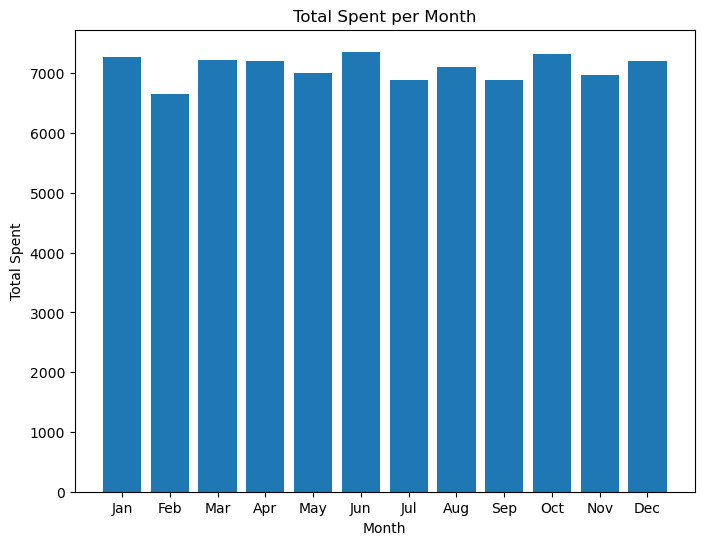

In [28]:
'''GRAFICOS'''
plt.figure(figsize=(8,6))
plt.bar(totalspent_month.index, totalspent_month.values)
plt.title('Total Spent per Month')
plt.xticks(totalspent_month.index, month_name)
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.show()